In [1]:
%pip install py-feat


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from feat import Fex
from feat import Detector

import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
import csv # Preprocessing
import matplotlib.pyplot as plt

# Libraries for model training
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
# Saving the image labels into a CSV file
header = 'label'
header = header.split()

file = open('emotionslabel.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
emotions = 'anger disgust fear happy neutral sad surprise'.split()

for m in emotions:
    for filename in os.listdir(f'images/{m}'):
        filename = f'images/{m}/{filename}'
        to_append = f'{m}'
        file = open('emotionslabel.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [12]:
detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='svm',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)

detector

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=svm, emotion_model=resmasknet, facepose_model=img2pose)

In [22]:
images = glob.glob('images/*/*.jpg', recursive=False)

In [23]:
mixed_prediction = detector.detect_image(images, batch_size=20)
mixed_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,Roll,Yaw,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,4.420787,-0.212259,37.338142,48.322983,0.80321,5.465919,5.57361,6.345286,7.812287,...,-1.257063,-0.45221,0.999492,0.000101,0.000131,0.000189,0.000002,0.000079,0.000006,images\anger\10154.jpg
1,1,1.568839,1.130273,34.597195,45.819508,0.969486,6.71379,7.089191,7.940617,9.390182,...,13.945234,47.604616,0.999814,0.000029,0.000053,0.00006,0.000001,0.000041,0.000003,images\anger\117.jpg
2,2,2.253817,-0.586807,39.564362,51.220837,0.959381,4.784771,3.508948,2.882077,2.8502,...,-3.289934,-9.403058,0.893103,0.075909,0.004582,0.001043,0.01655,0.004363,0.004449,images\anger\13675.jpg
3,3,8.023793,3.277001,34.895699,41.650475,0.995364,4.181868,4.755292,6.000817,7.787922,...,-1.908027,5.804783,0.998642,0.000029,0.000246,0.000171,0.000053,0.000759,0.000099,images\anger\15471.jpg
4,4,5.486054,2.378933,37.340008,45.483555,0.959245,6.705106,7.438615,8.374623,9.714442,...,-6.976108,4.558059,0.937213,0.001742,0.000348,0.000179,0.025373,0.00021,0.034935,images\anger\1558.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,170,1.242419,-3.257163,38.798569,55.596889,0.764192,3.380751,2.296906,2.087315,2.932202,...,1.292842,-10.128955,0.020178,0.000295,0.016201,0.000964,0.00366,0.93779,0.020912,images\surprise\61.jpg
171,171,5.536549,-0.476156,34.460732,43.026371,0.940884,1.395814,2.007655,3.205238,5.235259,...,-12.333209,7.169076,0.100073,0.000097,0.026983,0.006621,0.003553,0.746252,0.116421,images\surprise\6419.jpg
172,172,2.495527,1.249969,40.716858,49.492813,0.721187,9.044719,10.154835,11.856644,13.907263,...,-25.37455,2.710789,0.000579,0.000001,0.001267,0.000035,0.000041,0.99796,0.000116,images\surprise\7034.jpg
173,173,6.408597,2.893928,38.228298,47.306564,0.901755,2.15712,4.222015,6.931758,10.174375,...,-2.029263,3.520131,0.133269,0.000318,0.009837,0.012914,0.000159,0.836194,0.007309,images\surprise\8698.jpg


In [43]:
# Convert FEX to .csv
def fexToCsv(fex):
    facebox_fex = fex.facebox
    aus_fex = fex.aus
    facepose_fex = fex.facepose

    facebox_df = pd.DataFrame(facebox_fex)
    aus_df = pd.DataFrame(aus_fex)
    facepose_df = pd.DataFrame(facepose_fex)

    result_df = pd.concat([facebox_df, aus_df, facepose_df], axis=1, join='inner')
    result_df.to_csv('emotionsinterest.csv', index=False)

fexToCsv(mixed_prediction)

In [52]:
# Merge the csv with labels to the csv with the columns of interest (AUs, facebox, etc)
emotions_label = pd.read_csv('./emotionslabel.csv')
emotions_interests = pd.read_csv('./emotionsinterest.csv')

emotions = pd.concat([emotions_label, emotions_interests], axis=1, join='outer')
emotions.to_csv('emotionsdataset.csv', index=True)

In [18]:
# Training and Testing Data (creating the model)
# Note: The data will be divided in a ratio of 70:30 (training data:testing data) through stratified sampling
col_names = ['label','FaceRectX', 'FaceRectY', 'FaceRectWidth',
             'FaceRectHeight','FaceScore','AU01','AU02','AU04','AU05','AU06','AU07',
             'AU09','AU10','AU11','AU12','AU14','AU15','AU17','AU20',
             'AU23','AU24','AU25','AU26','AU28','AU43','Pitch','Roll',
             'Yaw']
emotions = pd.read_csv('emotionsdataset.csv')

# FaceRectX, FaceRectY, FaceRectWidth, FaceRectHeight, FaceScore, Pitch, Roll, Yaw
x = emotions.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]].values
# label
y = emotions.iloc[:,1].values

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=100, stratify=y)

In [24]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

Test Classes:
['neutral' 'surprise' 'neutral' 'anger' 'neutral' 'surprise' 'anger'
 'neutral' 'happy' 'fear' 'sad' 'anger' 'neutral' 'anger' 'happy' 'sad'
 'happy' 'disgust' 'anger' 'surprise' 'disgust' 'disgust' 'neutral'
 'anger' 'sad' 'surprise' 'disgust' 'happy' 'surprise' 'anger' 'happy'
 'anger' 'sad' 'fear' 'fear' 'surprise' 'surprise' 'neutral' 'fear'
 'surprise' 'fear' 'sad' 'disgust' 'neutral' 'happy' 'disgust' 'sad'
 'disgust' 'sad' 'happy' 'happy' 'fear' 'fear']
Predicted classes:
['sad' 'fear' 'neutral' 'sad' 'neutral' 'surprise' 'neutral' 'disgust'
 'anger' 'anger' 'disgust' 'sad' 'neutral' 'disgust' 'fear' 'neutral'
 'happy' 'disgust' 'neutral' 'surprise' 'neutral' 'neutral' 'fear'
 'disgust' 'neutral' 'anger' 'neutral' 'happy' 'surprise' 'happy'
 'disgust' 'fear' 'happy' 'surprise' 'fear' 'neutral' 'neutral' 'neutral'
 'surprise' 'surprise' 'fear' 'neutral' 'surprise' 'fear' 'sad' 'anger'
 'neutral' 'happy' 'disgust' 'surprise' 'happy' 'surprise' 'anger']
              

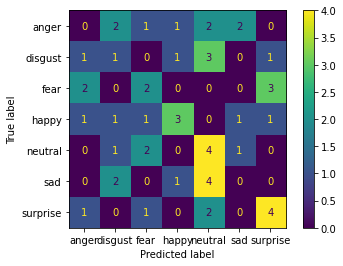

In [25]:
# Training the SVM Classifier

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)
svm_predictions = svm_clf.predict(x_test)

print("Test Classes:")
print(y_test)

print("Predicted classes:")
print(svm_predictions)

print(classification_report(y_test, svm_predictions))
cm = confusion_matrix(y_test, svm_predictions, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot()
plt.show()

Test Classes:
['neutral' 'surprise' 'neutral' 'anger' 'neutral' 'surprise' 'anger'
 'neutral' 'happy' 'fear' 'sad' 'anger' 'neutral' 'anger' 'happy' 'sad'
 'happy' 'disgust' 'anger' 'surprise' 'disgust' 'disgust' 'neutral'
 'anger' 'sad' 'surprise' 'disgust' 'happy' 'surprise' 'anger' 'happy'
 'anger' 'sad' 'fear' 'fear' 'surprise' 'surprise' 'neutral' 'fear'
 'surprise' 'fear' 'sad' 'disgust' 'neutral' 'happy' 'disgust' 'sad'
 'disgust' 'sad' 'happy' 'happy' 'fear' 'fear']
Predicted classes:
['sad' 'fear' 'sad' 'anger' 'fear' 'neutral' 'anger' 'sad' 'happy' 'anger'
 'happy' 'happy' 'neutral' 'neutral' 'anger' 'sad' 'happy' 'happy'
 'disgust' 'surprise' 'disgust' 'fear' 'sad' 'happy' 'neutral' 'happy'
 'anger' 'happy' 'surprise' 'happy' 'sad' 'disgust' 'anger' 'surprise'
 'neutral' 'disgust' 'anger' 'neutral' 'sad' 'sad' 'anger' 'sad' 'sad'
 'disgust' 'happy' 'fear' 'anger' 'happy' 'anger' 'happy' 'happy'
 'neutral' 'anger']
              precision    recall  f1-score   support

      

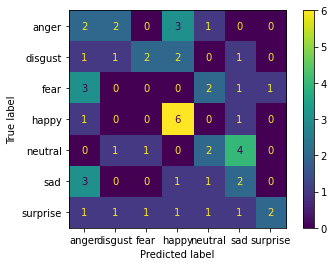

In [21]:
# Training the Decision Tree Classifier using Gini index attribute
clf_model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=None, min_samples_leaf=3)
clf_model.fit(x_train,y_train)
tree_predict = clf_model.predict(x_test)

print("Test Classes:")
print(y_test)

print("Predicted classes:")
print(tree_predict)

print(classification_report(y_test, tree_predict))
cm = confusion_matrix(y_test, tree_predict, labels=clf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_model.classes_)
disp.plot()
plt.show()

Test Classes:
['neutral' 'surprise' 'neutral' 'anger' 'neutral' 'surprise' 'anger'
 'neutral' 'happy' 'fear' 'sad' 'anger' 'neutral' 'anger' 'happy' 'sad'
 'happy' 'disgust' 'anger' 'surprise' 'disgust' 'disgust' 'neutral'
 'anger' 'sad' 'surprise' 'disgust' 'happy' 'surprise' 'anger' 'happy'
 'anger' 'sad' 'fear' 'fear' 'surprise' 'surprise' 'neutral' 'fear'
 'surprise' 'fear' 'sad' 'disgust' 'neutral' 'happy' 'disgust' 'sad'
 'disgust' 'sad' 'happy' 'happy' 'fear' 'fear']
Predicted classes:
['sad' 'surprise' 'neutral' 'sad' 'anger' 'surprise' 'anger' 'happy'
 'happy' 'neutral' 'fear' 'surprise' 'neutral' 'disgust' 'neutral' 'anger'
 'happy' 'happy' 'fear' 'surprise' 'neutral' 'fear' 'neutral' 'fear'
 'neutral' 'happy' 'disgust' 'happy' 'surprise' 'happy' 'happy' 'anger'
 'happy' 'fear' 'neutral' 'anger' 'neutral' 'neutral' 'surprise'
 'surprise' 'fear' 'neutral' 'surprise' 'neutral' 'happy' 'anger'
 'neutral' 'happy' 'happy' 'happy' 'happy' 'surprise' 'surprise']
              precis

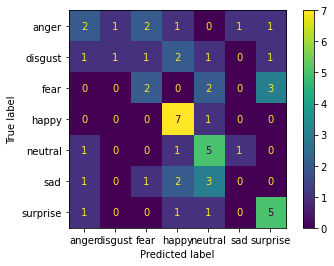

In [26]:
# Training the KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

print("Test Classes:")
print(y_test)

print("Predicted classes:")
print(knn_predictions)

print(classification_report(y_test, knn_predictions))
cm = confusion_matrix(y_test, knn_predictions, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot()
plt.show()